In [1]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
!rm -r /content/augmented_ecg_images_balanced


In [ ]:
!unzip "/content/drive/MyDrive/ECG_Project/augmented_ecg_images_balanced.zip" -d "/content/augmented_ecg_images_balanced"


Streaming output truncated to the last 5000 lines.
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug1.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug10.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug11.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug12.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug2.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug3.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug4.png  
  inflating: /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/History_of_MI/PMI(165)_aug5.png  
  inflating: /cont

In [ ]:
!mv /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced/* /content/augmented_ecg_images_balanced/
!rm -r /content/augmented_ecg_images_balanced/augmented_ecg_images_balanced


In [ ]:
import os
print(os.listdir("/content/augmented_ecg_images_balanced"))


['History_of_MI', 'Normal', 'Abnormal_Heartbeat', 'Myocardial_Infarction']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (384, 384)
batch_size = 32

# Dataset path
dataset_path = "/content/augmented_ecg_images_balanced"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 6564 images belonging to 4 classes.
Found 1640 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

input_shape = (384, 384, 3)
num_classes = 4

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 382, 382, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 382, 382, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 191, 191, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 189, 189, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 189, 189, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 94, 94, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 92, 92, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 92, 92, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 46, 46, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 44, 44, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 44, 44, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,748 (1.62 MB)

 Trainable params: 422,788 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
epochs = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 77s 321ms/step - accuracy: 0.3545 - loss: 1.4304 - val_accuracy: 0.1732 - val_loss: 1.6947
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 69s 281ms/step - accuracy: 0.6059 - loss: 0.9539 - val_accuracy: 0.3171 - val_loss: 1.2543
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.7188 - loss: 0.7189 - val_accuracy: 0.7872 - val_loss: 0.6836
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 56s 272ms/step - accuracy: 0.7636 - loss: 0.6003 - val_accuracy: 0.7024 - val_loss: 0.6926
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.8151 - loss: 0.4959 - val_accuracy: 0.8189 - val_loss: 0.4850
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 275ms/step - accuracy: 0.8386 - loss: 0.4555 - val_accuracy: 0.8110 - val_loss: 0.4839
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 275ms/step - accuracy: 0.8612 - loss: 0.3808 - val_accuracy: 0.6482 - val_loss: 1.0202
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 56s 272ms/step - accuracy: 0.8809 - loss: 0

In [ ]:
model.save("ecg_cnn_model_v2.h5")


In [ ]:
from google.colab import files
files.download("ecg_cnn_model_v2.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_labels = list(train_gen.class_indices.keys())

def predict_ecg_image(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(384, 384))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    predicted_class_idx = np.argmax(preds)
    confidence = preds[0][predicted_class_idx] * 100
    predicted_label = class_labels[predicted_class_idx]

    # Show image
    display_img = image.load_img(img_path)
    plt.imshow(display_img)
    plt.axis('off')
    plt.title(f"🖼️ Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    # Print result
    print(f"🩺 Predicted Class: {predicted_label}")
    print(f"🔢 Confidence: {confidence:.2f}%\n")

    # Print full breakdown
    print("📊 Class Confidence Breakdown:")
    for i, label in enumerate(class_labels):
        print(f"{label}: {preds[0][i]*100:.2f}%")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MI(15)_aug5.png to MI(15)_aug5.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


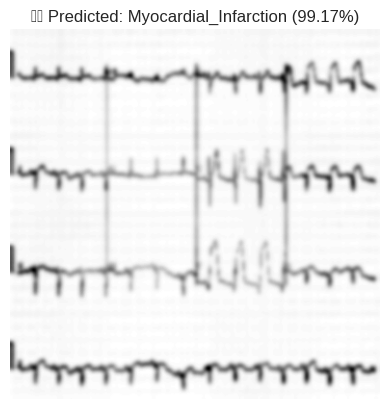

🩺 Predicted Class: Myocardial_Infarction
🔢 Confidence: 99.17%

📊 Class Confidence Breakdown:
Abnormal_Heartbeat: 0.73%
History_of_MI: 0.09%
Myocardial_Infarction: 99.17%
Normal: 0.01%


In [ ]:
predict_ecg_image("MI(15)_aug5.png")


<ipython-input-78-bdbe62dea2f3>:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


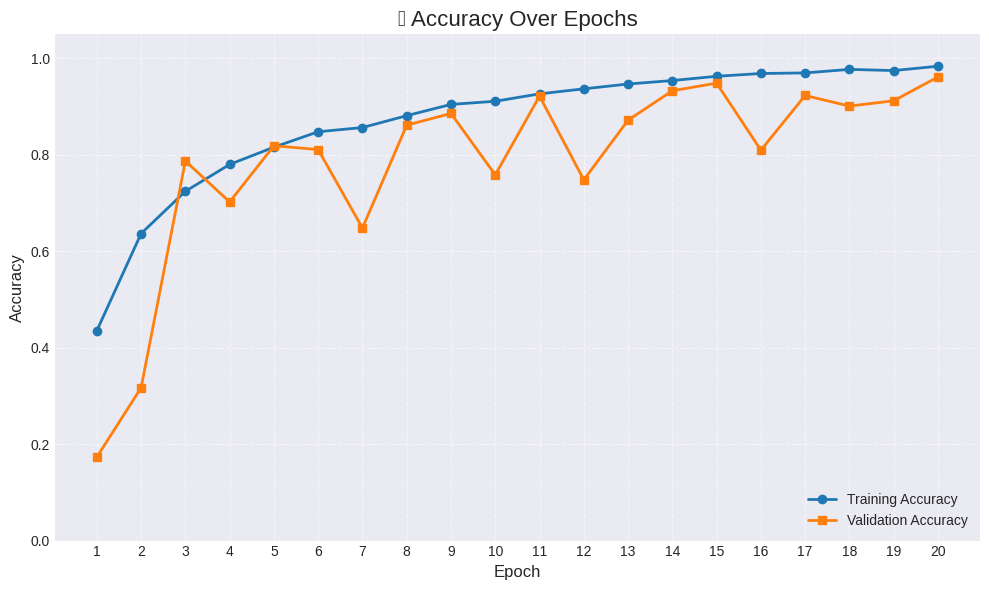

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')  # Clean & modern style

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label='Training Accuracy', marker='o', linewidth=2)
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='s', linewidth=2)

plt.title('📈 Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


<ipython-input-79-b5eff2669a29>:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


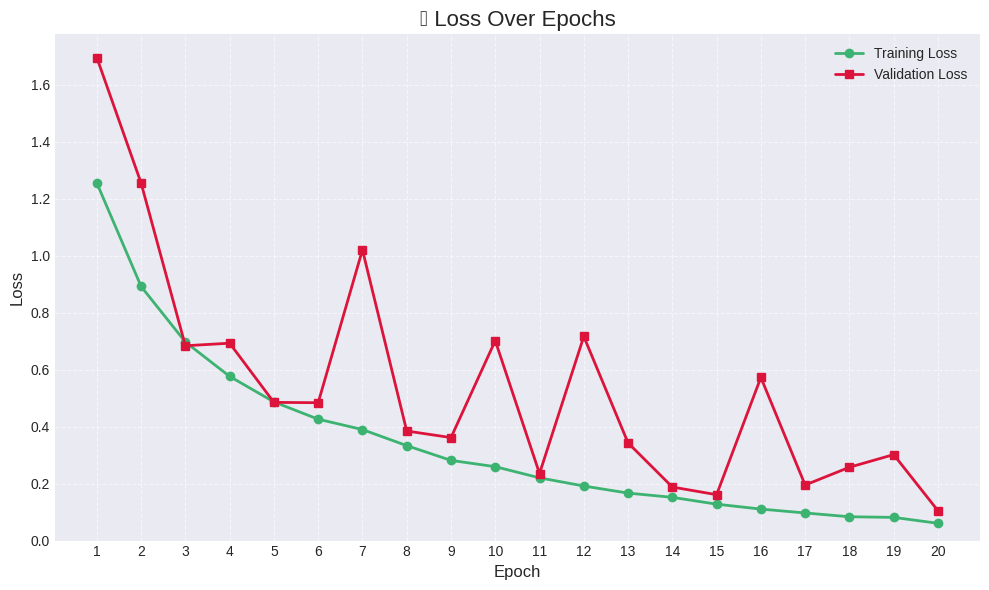

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linewidth=2, color='mediumseagreen')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s', linewidth=2, color='crimson')

plt.title('📉 Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-80-65ab12391892>:13: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


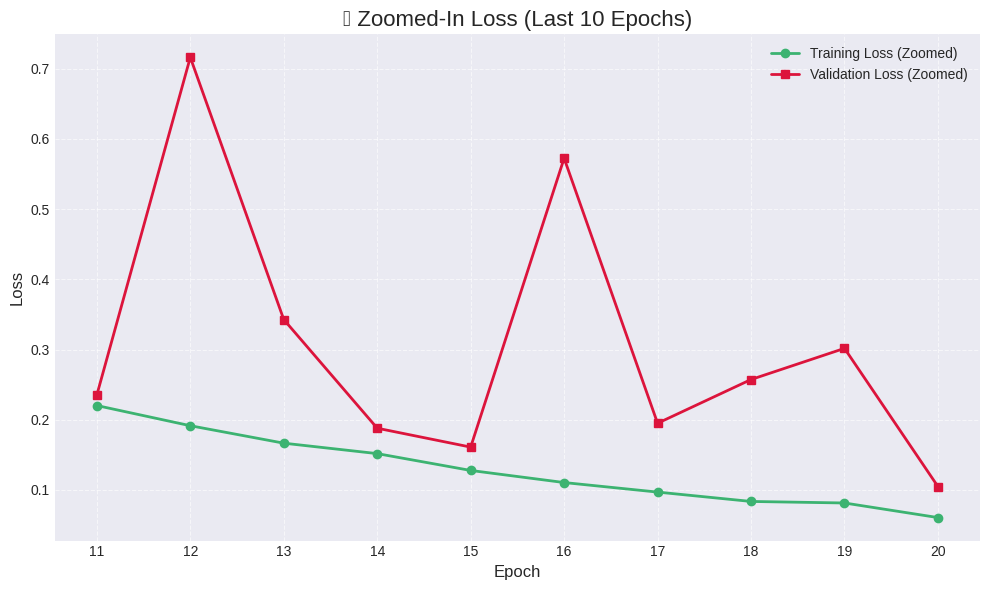

In [ ]:
plt.figure(figsize=(10, 6))

# Last 10 epochs
plt.plot(epochs[-10:], loss[-10:], label='Training Loss (Zoomed)', marker='o', linewidth=2, color='mediumseagreen')
plt.plot(epochs[-10:], val_loss[-10:], label='Validation Loss (Zoomed)', marker='s', linewidth=2, color='crimson')

plt.title('🔎 Zoomed-In Loss (Last 10 Epochs)', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs[-10:])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions and true labels
val_gen.reset()
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())


52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step


<ipython-input-82-126c5403d266>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


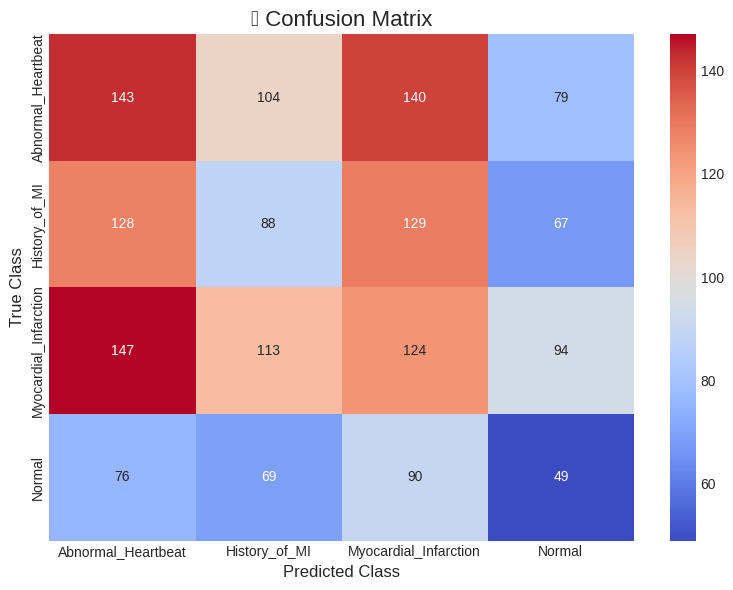

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('📊 Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)


<ipython-input-84-5540e1639855>:7: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


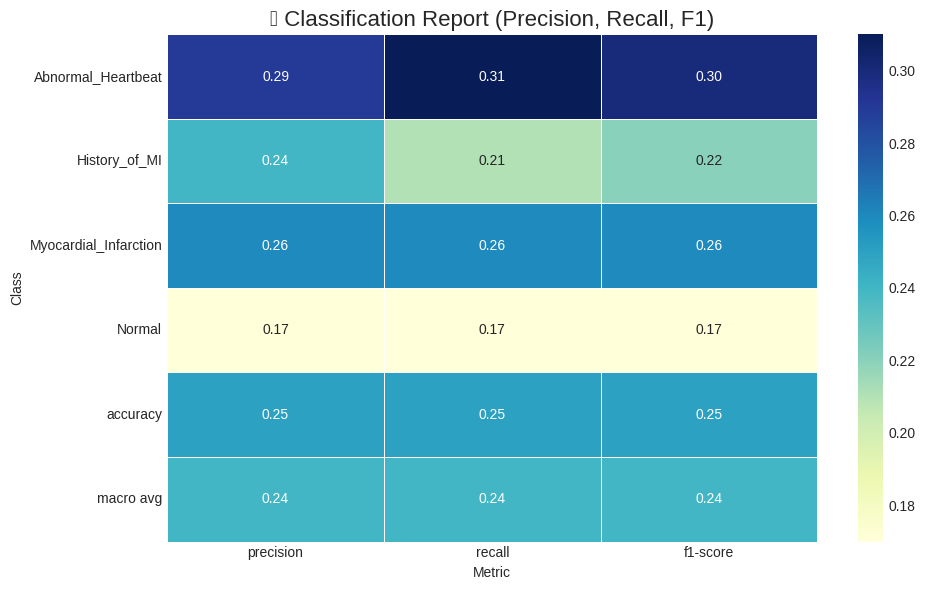

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("📋 Classification Report (Precision, Recall, F1)", fontsize=16)
plt.xlabel("Metric")
plt.ylabel("Class")
plt.tight_layout()
plt.show()


<ipython-input-85-b092ae5eca39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=per_class_acc, palette='viridis')
<ipython-input-85-b092ae5eca39>:12: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


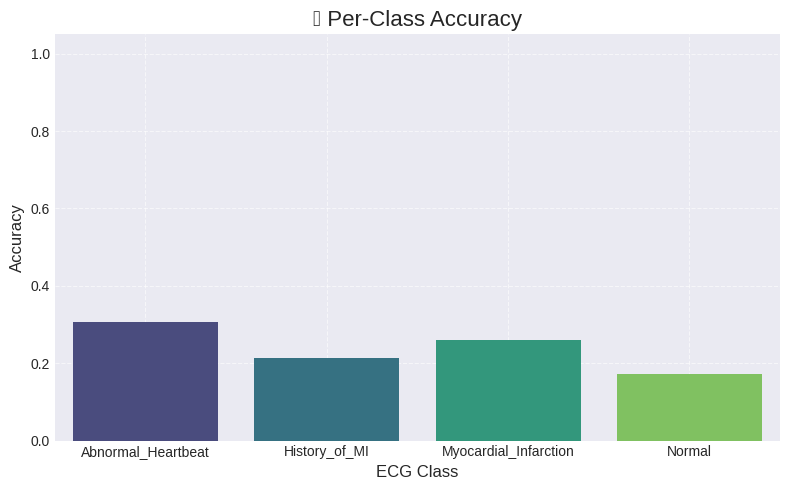

In [ ]:
# Reuse confusion matrix from earlier
per_class_acc = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(8, 5))
sns.barplot(x=class_labels, y=per_class_acc, palette='viridis')

plt.ylim(0, 1.05)
plt.title('✅ Per-Class Accuracy', fontsize=16)
plt.xlabel('ECG Class', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Predicted probabilities and predicted classes (already done earlier)
confidences = np.max(y_pred, axis=1)  # highest softmax prob per sample


<ipython-input-87-c8d89e7a4a0b>:8: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


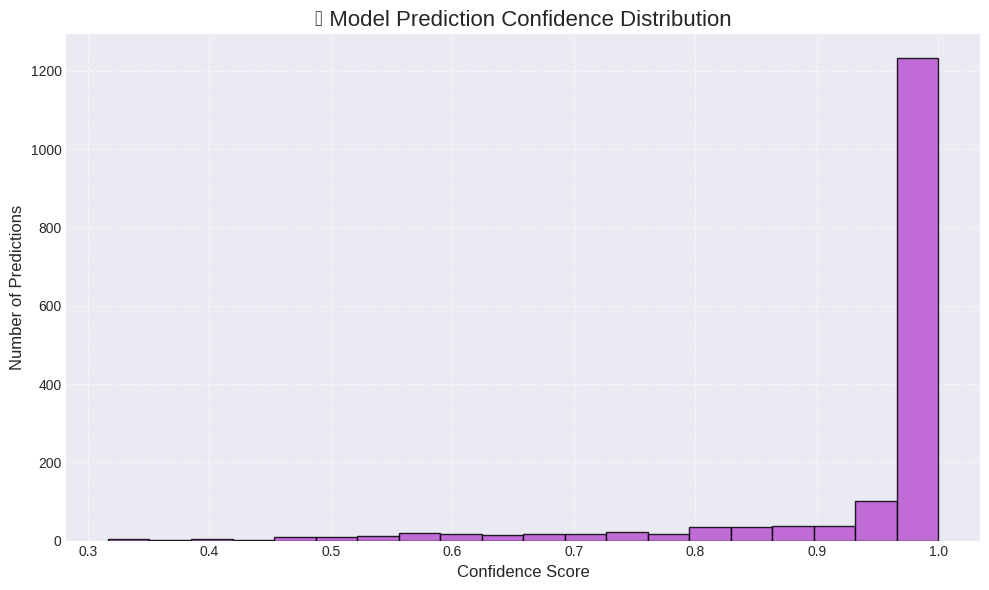

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(confidences, bins=20, color='mediumorchid', edgecolor='black', alpha=0.85)

plt.title('🔎 Model Prediction Confidence Distribution', fontsize=16)
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize

# Convert integer labels to one-hot encoded form
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))


<ipython-input-89-347395d68218>:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


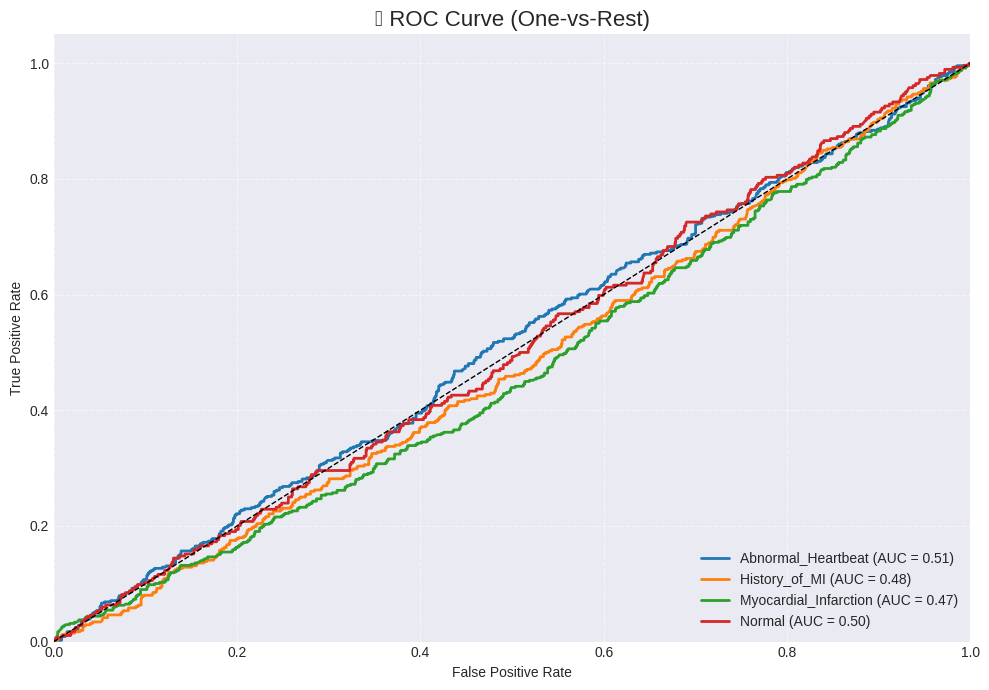

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('📈 ROC Curve (One-vs-Rest)', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
model.save("ecg_model_final.h5")


In [ ]:
from google.colab import files
files.download("ecg_model_final.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>